In [796]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [797]:
csv_list = ['aapl_historical.csv','algo_returns.csv', 'cost_historical.csv','goog_historical.csv', 'sp500_history.csv', 'whale_returns.csv']


In [798]:
aapl_csv = pd.read_csv('aapl_historical.csv', parse_dates=[0], infer_datetime_format=True)
algo_csv = pd.read_csv('algo_returns.csv', parse_dates=[0], infer_datetime_format=True)
cost_csv = pd.read_csv('cost_historical.csv', parse_dates=[0], infer_datetime_format=True)
goog_csv = pd.read_csv('goog_historical.csv', parse_dates=[0], infer_datetime_format=True)
sp500_csv = pd.read_csv('sp500_history.csv', parse_dates=[0], infer_datetime_format=True)
whale_csv = pd.read_csv('whale_returns.csv', parse_dates=[0], infer_datetime_format=True)

In [799]:
whale_csv.set_index(['Date'], inplace=True)

In [800]:
whale_csv.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [801]:
whale_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [802]:
whale_csv = whale_csv.dropna()

In [803]:
whale_csv.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [804]:
algo_csv.set_index(['Date'], inplace=True)

In [805]:
algo_csv.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [806]:
algo_csv = algo_csv.dropna()

In [807]:
algo_csv.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [808]:
sp500_csv.set_index(['Date'], inplace=True)

In [809]:
sp500_csv.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [810]:
sp500_csv = sp500_csv.sort_index()

In [811]:
sp500_csv['Close'] = sp500_csv['Close'].str.replace('$', "")

In [812]:
sp500_csv['Close'] = sp500_csv['Close'].astype('float')

In [813]:
sp500_csv['Close'] = sp500_csv['Close'].pct_change()

In [814]:
sp500_csv.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [815]:
sp500_csv = sp500_csv.dropna()

In [816]:
sp500_csv.rename(columns={'Close': 'S&P 500'}, inplace=True)

In [817]:
sp500_csv.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [818]:
combined_data = pd.concat([whale_csv, algo_csv, sp500_csv], axis='columns', join='inner')

In [819]:
combined_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


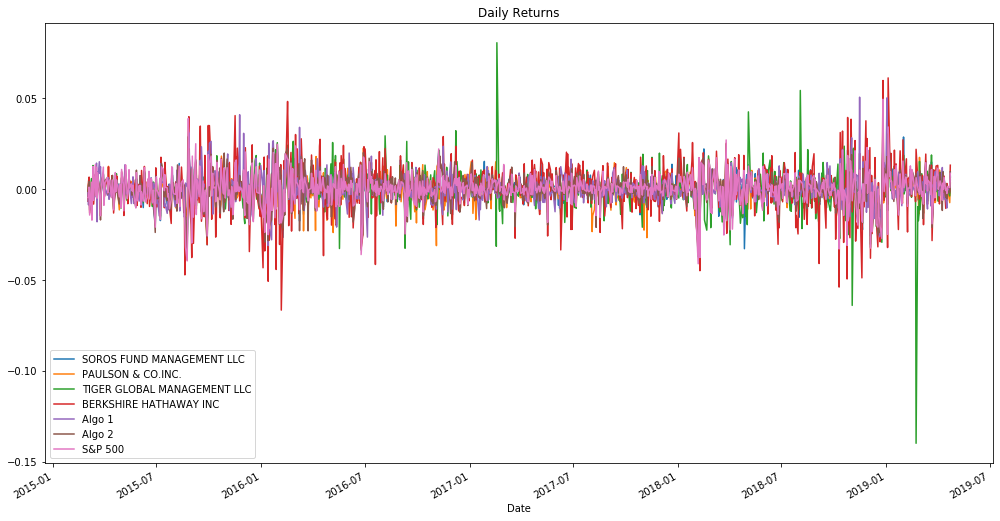

In [820]:
combined_data.plot(figsize=(17,9), title= 'Daily Returns')

In [821]:
cumulative_r = (1 + combined_data).cumprod()
cumulative_r.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072


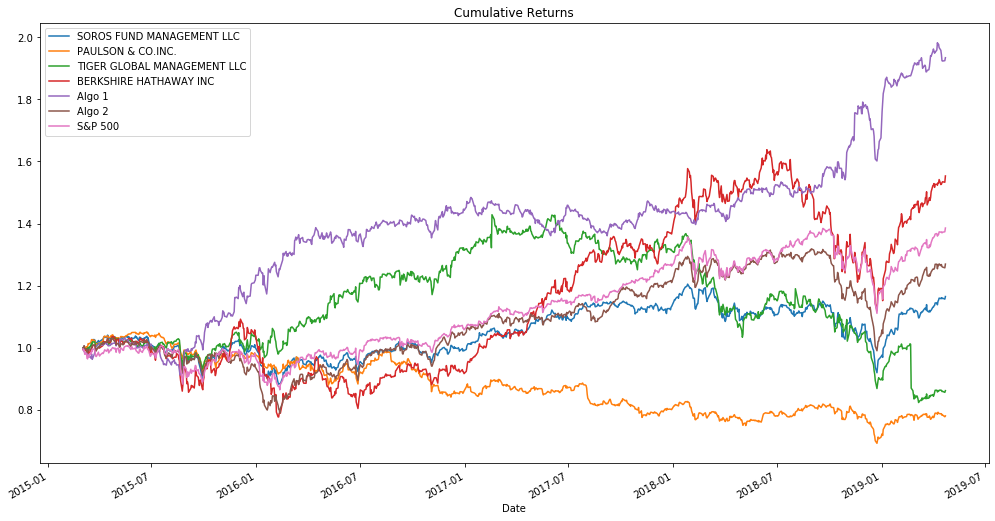

In [822]:
cumulative_r.plot(kind='line', figsize=(17,9), title= "Cumulative Returns")

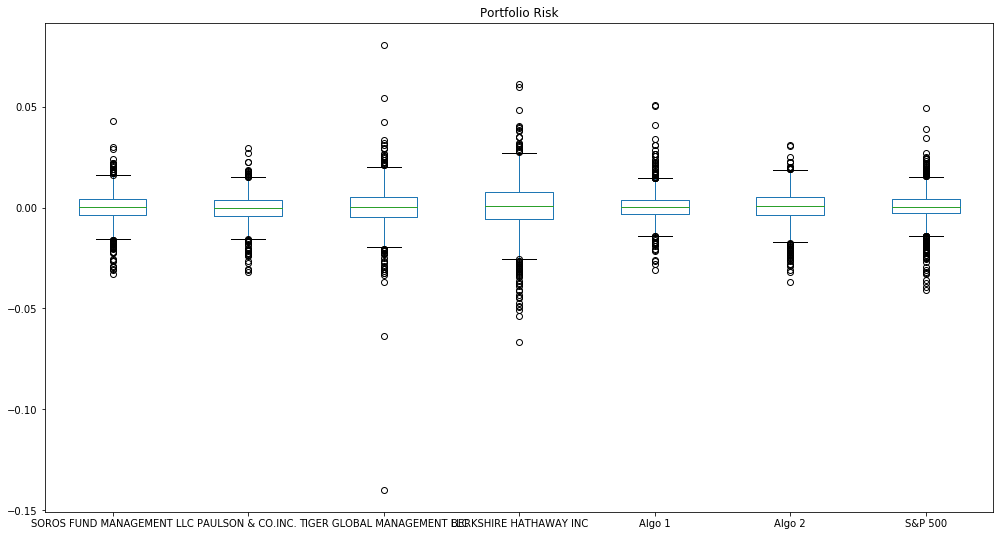

In [823]:
combined_data.plot(kind= 'box', figsize=(17,9), title= 'Portfolio Risk')

In [824]:
combined_data.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [825]:
combined_data.std()>combined_data.std().loc['S&P 500']

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [826]:
combined_data.std()*15.8745078664

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

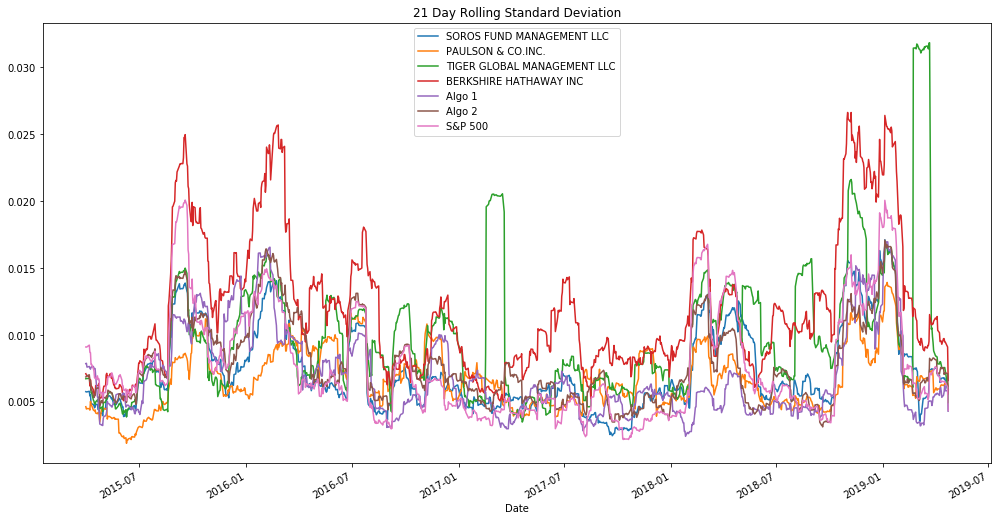

In [827]:
combined_data.rolling(21).std().plot(kind='line', figsize= (17,9), title= '21 Day Rolling Standard Deviation')

In [828]:
combined_data.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [829]:
single_portfolio= whale_csv["BERKSHIRE HATHAWAY INC"]

In [830]:
single_portfolio.to_frame().head()

,BERKSHIRE HATHAWAY INC
Date,
2015-03-03,-0.006569
2015-03-04,0.004213
2015-03-05,0.006726
2015-03-06,-0.013098
2015-03-09,-0.001652


In [831]:
beta_df= pd.concat([single_portfolio, sp500_csv], axis= 'columns', join= 'inner')

In [832]:
beta_df.head()

,BERKSHIRE HATHAWAY INC,S&P 500
Date,,
2015-03-03,-0.006569,-0.004539
2015-03-04,0.004213,-0.004389
2015-03-05,0.006726,0.001196
2015-03-06,-0.013098,-0.014174
2015-03-09,-0.001652,0.003944


In [833]:
rolling_cov = beta_df["BERKSHIRE HATHAWAY INC"].rolling(window=30).cov(beta_df["S&P 500"])

In [834]:
rolling_var = beta_df["S&P 500"].rolling(window=30).var()

In [835]:
compared_beta= (rolling_cov / rolling_var)

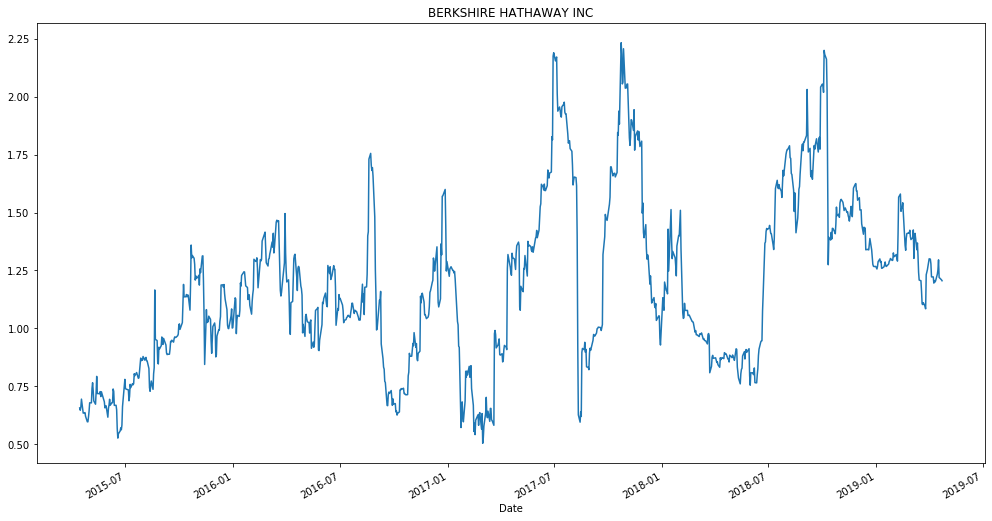

In [836]:
compared_beta.to_frame().head()
compared_beta.plot(figsize= (17,9), title= "BERKSHIRE HATHAWAY INC")

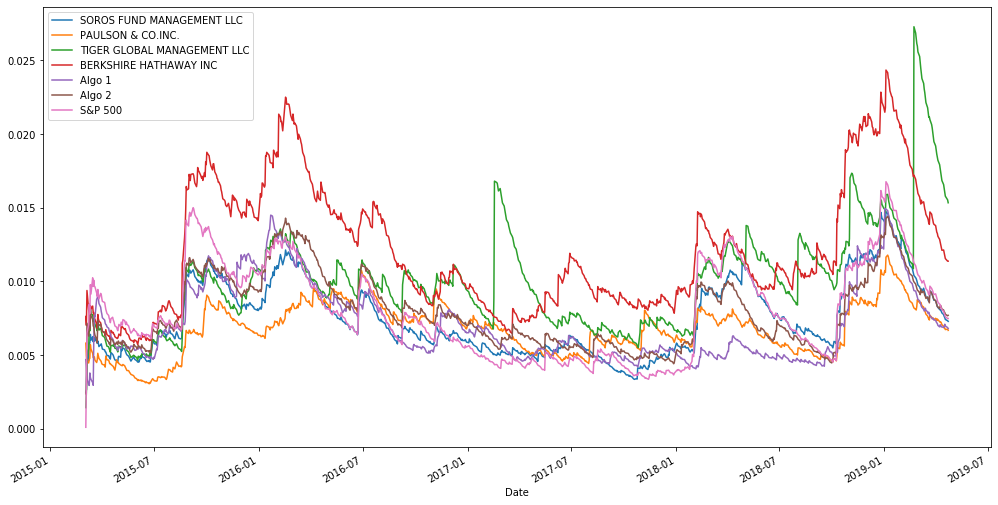

In [837]:
rolling_ewm = combined_data.ewm(halflife= 21).std().plot(kind='line', figsize= (17,9))

In [838]:
sharpe_ratio = combined_data.mean() / combined_data.std()

In [839]:
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.022452
PAULSON & CO.INC.             -0.030462
TIGER GLOBAL MANAGEMENT LLC   -0.007626
BERKSHIRE HATHAWAY INC         0.039170
Algo 1                         0.086847
Algo 2                         0.031583
S&P 500                        0.040837
dtype: float64

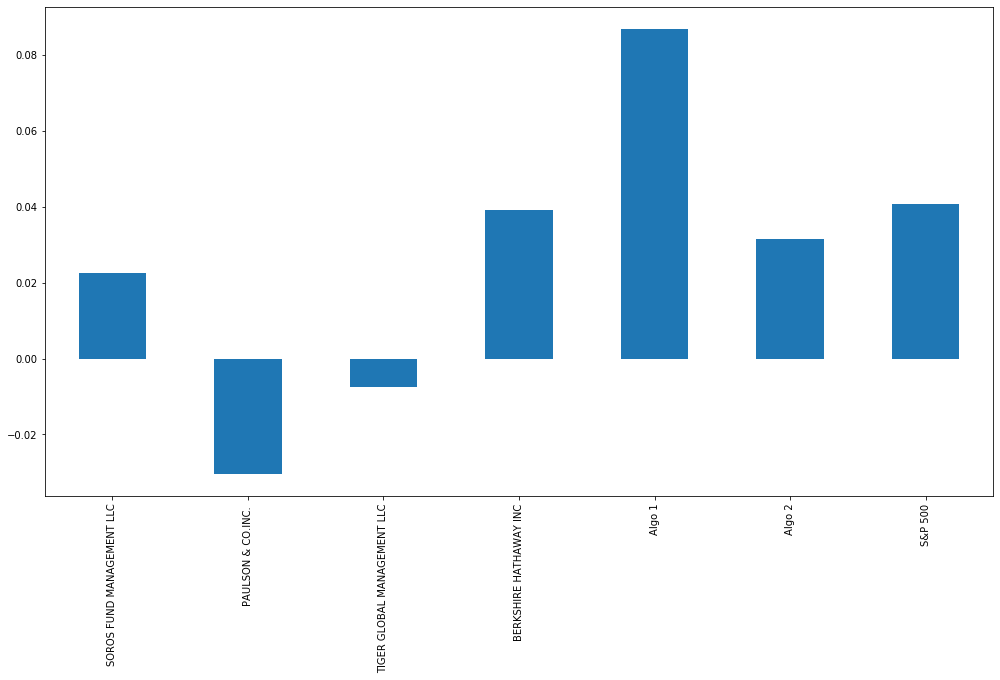

In [840]:
sharpe_ratio.plot(kind='bar', figsize=(17,9))

In [841]:
goog_csv.set_index(['Trade DATE'], inplace=True)

In [842]:
goog_csv.head()

,Symbol,NOCP
Trade DATE,,
5/9/2019,GOOG,1162.38
5/8/2019,GOOG,1166.27
5/7/2019,GOOG,1174.10
5/6/2019,GOOG,1189.39
5/3/2019,GOOG,1185.40


In [843]:
goog_csv.sort_index()
goog_csv.head()

,Symbol,NOCP
Trade DATE,,
5/9/2019,GOOG,1162.38
5/8/2019,GOOG,1166.27
5/7/2019,GOOG,1174.10
5/6/2019,GOOG,1189.39
5/3/2019,GOOG,1185.40


In [844]:
aapl_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      250 non-null    object 
 1   Trade DATE  250 non-null    object 
 2   NOCP        250 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.0+ KB


In [845]:
aapl_csv.set_index(['Trade DATE'], inplace=True)

In [846]:
aapl_csv.head()

,Symbol,NOCP
Trade DATE,,
5/9/2019,AAPL,200.72
5/8/2019,AAPL,202.90
5/7/2019,AAPL,202.86
5/6/2019,AAPL,208.48
5/3/2019,AAPL,211.75


In [847]:
cost_csv.set_index(['Trade DATE'], inplace=True)

In [848]:
cost_csv.head()

,Symbol,NOCP
Trade DATE,,
5/9/2019,COST,243.47
5/8/2019,COST,241.34
5/7/2019,COST,240.18
5/6/2019,COST,244.23
5/3/2019,COST,244.62


In [864]:
custom_stocks = pd.concat([aapl_csv, cost_csv, goog_csv], axis= 'rows', join= 'inner')

In [870]:
custom_stocks.head()

,Symbol,NOCP
Trade DATE,,
5/9/2019,AAPL,200.72
5/8/2019,AAPL,202.90
5/7/2019,AAPL,202.86
5/6/2019,AAPL,208.48
5/3/2019,AAPL,211.75


In [874]:
custom_stocks.reset_index(inplace=True)

In [875]:
custom_stocks.head()

,Trade DATE,Symbol,NOCP
0,5/9/2019,AAPL,200.72
1,5/8/2019,AAPL,202.90
2,5/7/2019,AAPL,202.86
3,5/6/2019,AAPL,208.48
4,5/3/2019,AAPL,211.75


In [876]:
custom_stocks['Trade DATE'] =  pd.to_datetime(custom_stocks['Trade DATE'], format='%m/%d/%Y')

In [877]:
custom_stocks.head()

,Trade DATE,Symbol,NOCP
0,2019-05-09,AAPL,200.72
1,2019-05-08,AAPL,202.90
2,2019-05-07,AAPL,202.86
3,2019-05-06,AAPL,208.48
4,2019-05-03,AAPL,211.75


In [880]:
custom_stocks = custom_stocks.pivot_table(index= 'Trade DATE', columns= 'Symbol', values= 'NOCP')

In [881]:
custom_stocks.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [892]:
custom_stocks = custom_stocks.pct_change()

In [897]:
custom_stocks.dropna(inplace=True)

In [894]:
weights = [1/3, 1/3, 1/3]

In [924]:
custom_df = custom_stocks.dot(weights)


In [925]:
custom_df.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

In [955]:
custom_df= pd.DataFrame(custom_df)

In [956]:
custom_df.columns = ['Custom']

In [949]:
full_df = pd.concat([combined_data, custom_df], axis= 'columns', join= 'inner')

In [950]:
full_df.replace(0, np.nan, inplace=True)

In [951]:
full_df= full_df.dropna(axis='index')

In [957]:
full_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
2018-05-21,0.002503,-0.001195,-0.001153,0.010370,-0.003092,0.004924,0.007387,0.007600


In [958]:
full_df.std()

SOROS FUND MANAGEMENT LLC      0.009339
PAULSON & CO.INC.              0.007433
TIGER GLOBAL MANAGEMENT LLC    0.014805
BERKSHIRE HATHAWAY INC         0.015737
Algo 1                         0.008486
Algo 2                         0.008842
S&P 500                        0.009640
Custom                         0.013424
dtype: float64

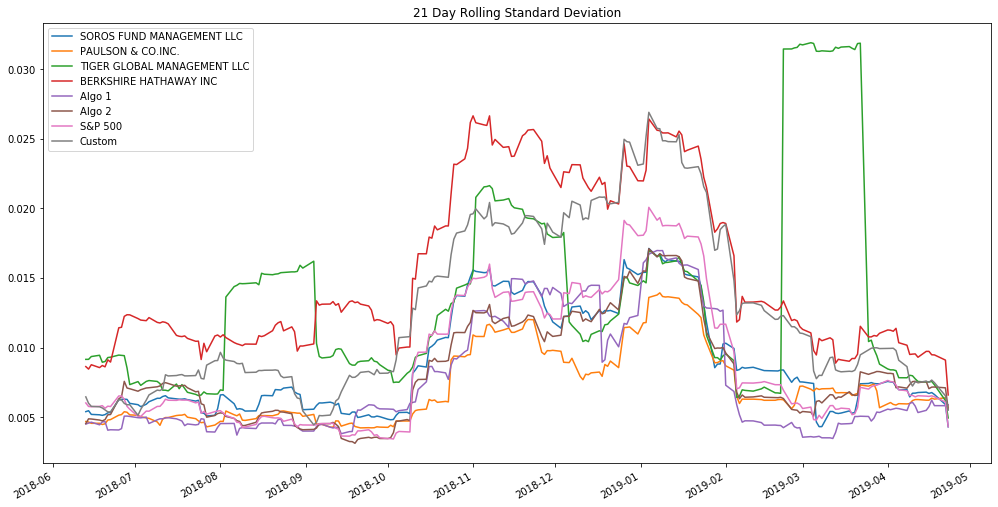

In [959]:
full_df.rolling(21).std().plot(kind='line', figsize= (17,9), title= '21 Day Rolling Standard Deviation')

In [960]:
new_sharpe_ratio= full_df.mean() / full_df.std()

In [961]:
new_sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.027422
PAULSON & CO.INC.              0.016473
TIGER GLOBAL MANAGEMENT LLC   -0.065848
BERKSHIRE HATHAWAY INC         0.010171
Algo 1                         0.135002
Algo 2                         0.002204
S&P 500                        0.032338
Custom                         0.055955
dtype: float64

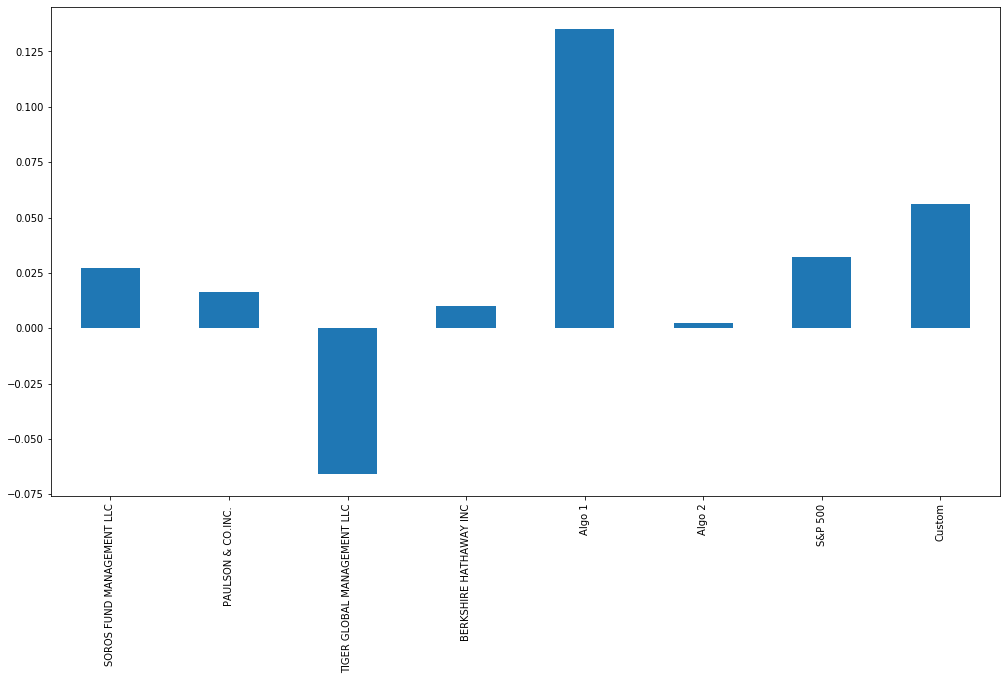

In [962]:
new_sharpe_ratio.plot(kind= 'bar', figsize=(17,9))

In [963]:
full_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791961,0.478691,0.816676,0.338713,0.867212,0.880925,0.735630
PAULSON & CO.INC.,0.791961,1.000000,0.485422,0.650757,0.362348,0.787594,0.770092,0.646279
TIGER GLOBAL MANAGEMENT LLC,0.478691,0.485422,1.000000,0.325486,0.115441,0.411359,0.482865,0.393066
BERKSHIRE HATHAWAY INC,0.816676,0.650757,0.325486,1.000000,0.327983,0.786718,0.856060,0.803705
Algo 1,0.338713,0.362348,0.115441,0.327983,1.000000,0.365609,0.289653,0.261153
Algo 2,0.867212,0.787594,0.411359,0.786718,0.365609,1.000000,0.874815,0.739349
S&P 500,0.880925,0.770092,0.482865,0.856060,0.289653,0.874815,1.000000,0.871758
Custom,0.735630,0.646279,0.393066,0.803705,0.261153,0.739349,0.871758,1.000000


In [968]:
new_rolling_cov = full_df["Custom"].rolling(window=30).cov(full_df["S&P 500"])

In [969]:
new_rolling_var = full_df["S&P 500"].rolling(window=30).var()

In [970]:
new_compared_beta= (new_rolling_cov / new_rolling_var)

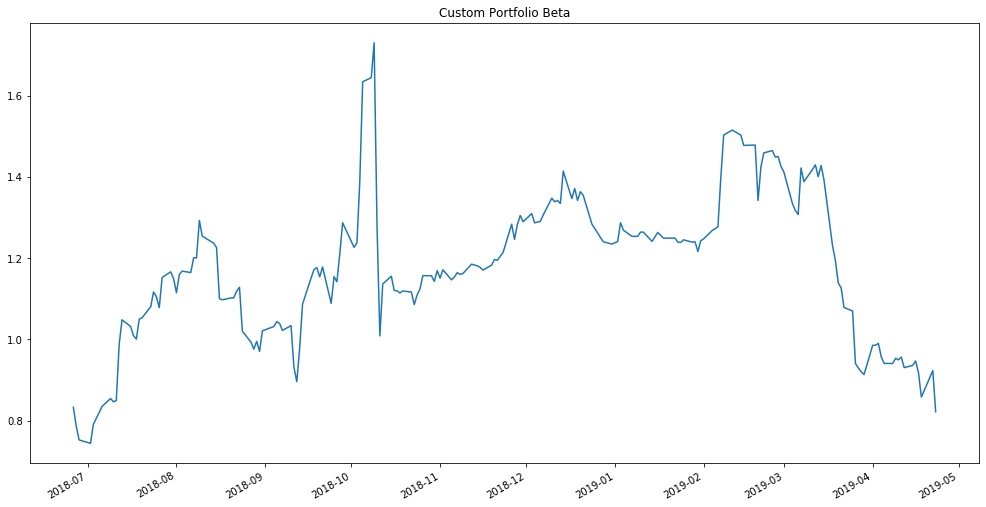

In [976]:
new_compared_beta.plot(kind='line', figsize= (17,9), title= 'Custom Portfolio Beta')